In [32]:
# Importing pre-requisite libraries
import numpy as np # For mathematical calculations
import pandas as pd # For dealing with dataframes (i.e. pd.read_csv())
import time # Measuring start and end training times
import matplotlib.pyplot as plt # Displaying graphs 
import seaborn as sns

# 1. Comprehending the data 

## Opening CSV + Checking for missing values

In [3]:
df = pd.read_csv(r'C:\Users\Khalid\Desktop\ML Projects\Beginner\Credit Card Fraud\creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# 2. Data Preprocessing

## Scaling + distribution

In [6]:
# We can see from the dataset that the V1, V2, V3 values aren't understandable and the only sensible pieces of data are amount and time
# Due to this, we can scale these features with robust scaler to mitigate outliers (data that falls out of place)
# We will do this by creating new features (feature engineering) called 'scaled_amount' and 'scaled_time'

from sklearn.preprocessing import StandardScaler, RobustScaler 

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.
                                              reshape(-1,1))

df['scaled_time'] = rob_scaler.fit_transform(df['Amount'].values.
                                            reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [7]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
# Checking the percentage of frauded and non-frauded cases

print("Non frauded cases: ", round(df['Class'].value_counts()[0]/len(df) 
                                   * 100, 2), "% of the dataset.")

print("Frauded cases: ", round(df['Class'].value_counts()[1]/len(df) 
                                   * 100, 2), "% of the dataset.")


Non frauded cases:  99.83 % of the dataset.
Frauded cases:  0.17 % of the dataset.


## Random Undersampling 

In [9]:
# New dataframes for frauded and non-frauded transactions
# We are already aware that there's 492 frauded transactions
# Therefore, we've limited the non frauded transactions to 492 to prevent overfitting

# Due to the reduced dataframe size, there is a risk of inaccuracy

frauded_df = df.loc[df['Class'] == 1]
non_frauded_df = df.loc[df['Class'] == 0][:492]

balanced_df = pd.concat([frauded_df, non_frauded_df]) # Joining the two dataframes together

# Sampling the dataset
new_df = balanced_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.179976,-0.179976,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,...,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.307413,-0.307413,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.027947,-0.027947,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,...,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,3.007895,3.007895,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,3.226717,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


In [10]:
# Now the number of frauded and non-frauded cases are even
# Though there's a risk of accuracy loss due to dataframe being diluted
# 200,000+ --> 984

print("Non frauded cases: ", round(new_df['Class'].value_counts()[0]/len(new_df) 
                                   * 100, 2), "% of the dataset.")

print("Frauded cases: ", round(new_df['Class'].value_counts()[1]/len(new_df) 
                                   * 100, 2), "% of the dataset.")


Non frauded cases:  50.0 % of the dataset.
Frauded cases:  50.0 % of the dataset.


### We can now see that the dataset is now equal, though there is a huge loss in data which can affect accuracy 

## Checking the distribution of data in the new dataset 

In [35]:
from sklearn.decomposition import PCA # Dimensonality reduction
from sklearn.manifold import TSNE # Dimensionality reduction

In [36]:
# For this instance, we will use T-SNE to reduce the dimensonality of the data and find the distributions in the datapoints

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(new_df)

tsne_features[1:4,:]


array([[ 24.973862 , -25.781454 ],
       [-19.692865 ,  -8.602754 ],
       [ 14.045232 ,  -6.7534204]], dtype=float32)

In [38]:
X = new_df.drop('Class', axis=1)
y = new_df['Class'] # Predictor category

In [48]:
# T-SNE approach to random undersampled data

t0 = time.time() 
TSNE_X = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("Time taken for T-SNE reduction {:.2} s".format(t1-t0))

Time taken for T-SNE reduction 3.8 s


ValueError: The following variable cannot be assigned with wide-form data: `hue`

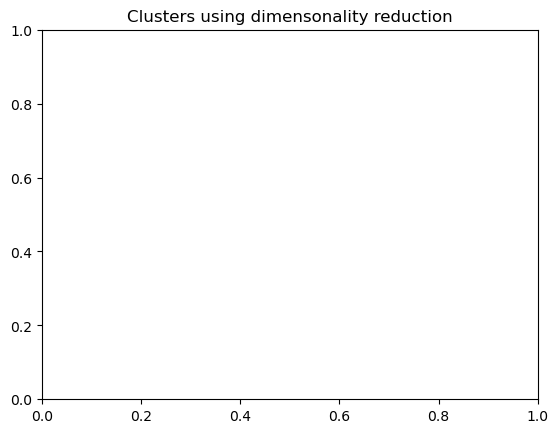

In [49]:
plt.title("Clusters using dimensonality reduction")

# T-SNE scatter plot
sns.scatterplot(data=TSNE_X, hue="Class")
plt.show()

## Oversampling (SMOTE) 

In [10]:
# from imblearn.over_sampling import SMOTE # Handling imbalanced data within the dataset

# oversample = SMOTE(random_state=42) # Defining SMOTE

# X, y = oversample.fit_resample(X, y) # Resampling the data with synthetic data

# 3. Training 

In [25]:
from sklearn.model_selection import learning_curve # For overfitting detection
from sklearn.model_selection import cross_val_score # For overfitting detection
from sklearn.ensemble import RandomForestRegressor # Will be used for the model
from xgboost import XGBRegressor # Alternative model
from sklearn.metrics import confusion_matrix, f1_score, classification_report # For confusion metrics as we are dealing with binary classification ('1' and '0')

### Training (Random Undersampling Approach) 

In [13]:
from sklearn.model_selection import train_test_split # Seperating the training and testing process

y = new_df['Class'] # Target predictor to determine frauded transactions

X = new_df.drop(columns=['Class']) # Dropping the target predictor column

# Test-train split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,
                                                     random_state=42)

In [14]:
# Defining the model, since it involves binary classes (i.e 1 for fraud and 0 for non fraud)
# We will use a regression model (i.e. random forest regressor)

# We have slightly modified the model to use all CPU cores for performance sake
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1,
                             max_depth=10)

### K-fold cross-validation 

In [27]:
start_time = time.time()

# We will use cross-validation to determine which model is the most efficient when the training and valdation data are split

scores = cross_val_score(model, X, y,
                          n_jobs=-1,
                         cv=5, scoring=
                         'neg_mean_absolute_error')

end_time = time.time()

cross_val_seconds = end_time - start_time # Find the difference
cross_val_minutes = cross_val_seconds / 60 # Convert to minutes format

print(f"Training time: {cross_val_minutes:2f}")
print(f"\nModel Performance: {scores}")

Training time: 0.026473

Model Performance: [-0.08030686 -0.08345263 -0.07875817 -0.08684584 -0.10807667]


### Confusion Matrix + F-1 score 

In [28]:
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

In [29]:
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

ValueError: Classification metrics can't handle a mix of binary and continuous targets